In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('covid_19_clean_complete.csv')
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [5]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [6]:
data.rename(columns={"Country/Region":"Country"},inplace=True)
data.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [7]:
### Get the latest data
top = data[data['Date'] == data['Date'].max()]
top

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [8]:
top['Country'].value_counts().head(50)  #shows how many times the data is occurring in the country

China                               33
Canada                              12
United Kingdom                      11
France                              11
Australia                            8
Netherlands                          4
Denmark                              2
Oman                                 1
Italy                                1
Botswana                             1
Antigua and Barbuda                  1
Vietnam                              1
Kuwait                               1
Nicaragua                            1
Sierra Leone                         1
Kenya                                1
Eritrea                              1
Qatar                                1
Equatorial Guinea                    1
Jordan                               1
Iran                                 1
Grenada                              1
Holy See                             1
Sudan                                1
Hungary                              1
Trinidad and Tobago      

In [9]:
### Grouping the data by Country
world = top.groupby("Country")[	"Confirmed","Deaths","Recovered","Active"].sum()
world

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Confirmed,Deaths,Recovered,Active
Country,,,,
Afghanistan,36263,1269,25198,9796
Albania,4880,144,2745,1991
Algeria,27973,1163,18837,7973
Andorra,907,52,803,52
Angola,950,41,242,667
...,...,...,...,...
West Bank and Gaza,10621,78,3752,6791
Western Sahara,10,1,8,1
Yemen,1691,483,833,375


In [10]:
world = world.reset_index()

In [11]:
world.head()

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667


In [12]:
### plot the data on the world map
world_map = px.choropleth(world, locations = 'Country', locationmode = 'country names',
                          color_continuous_scale = 'Peach', range_color = [1,300000], color = 'Confirmed')
world_map.show()

In [13]:
world_map = px.choropleth(world, locations = 'Country', locationmode = 'country names',
                          color_continuous_scale = 'rainbow', range_color = [1,300000], color = 'Confirmed')
world_map.show()

In [14]:
## Plot Active Cases Vs Date
total_active_cases = data.groupby('Date')['Active'].sum().reset_index()
total_active_cases

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


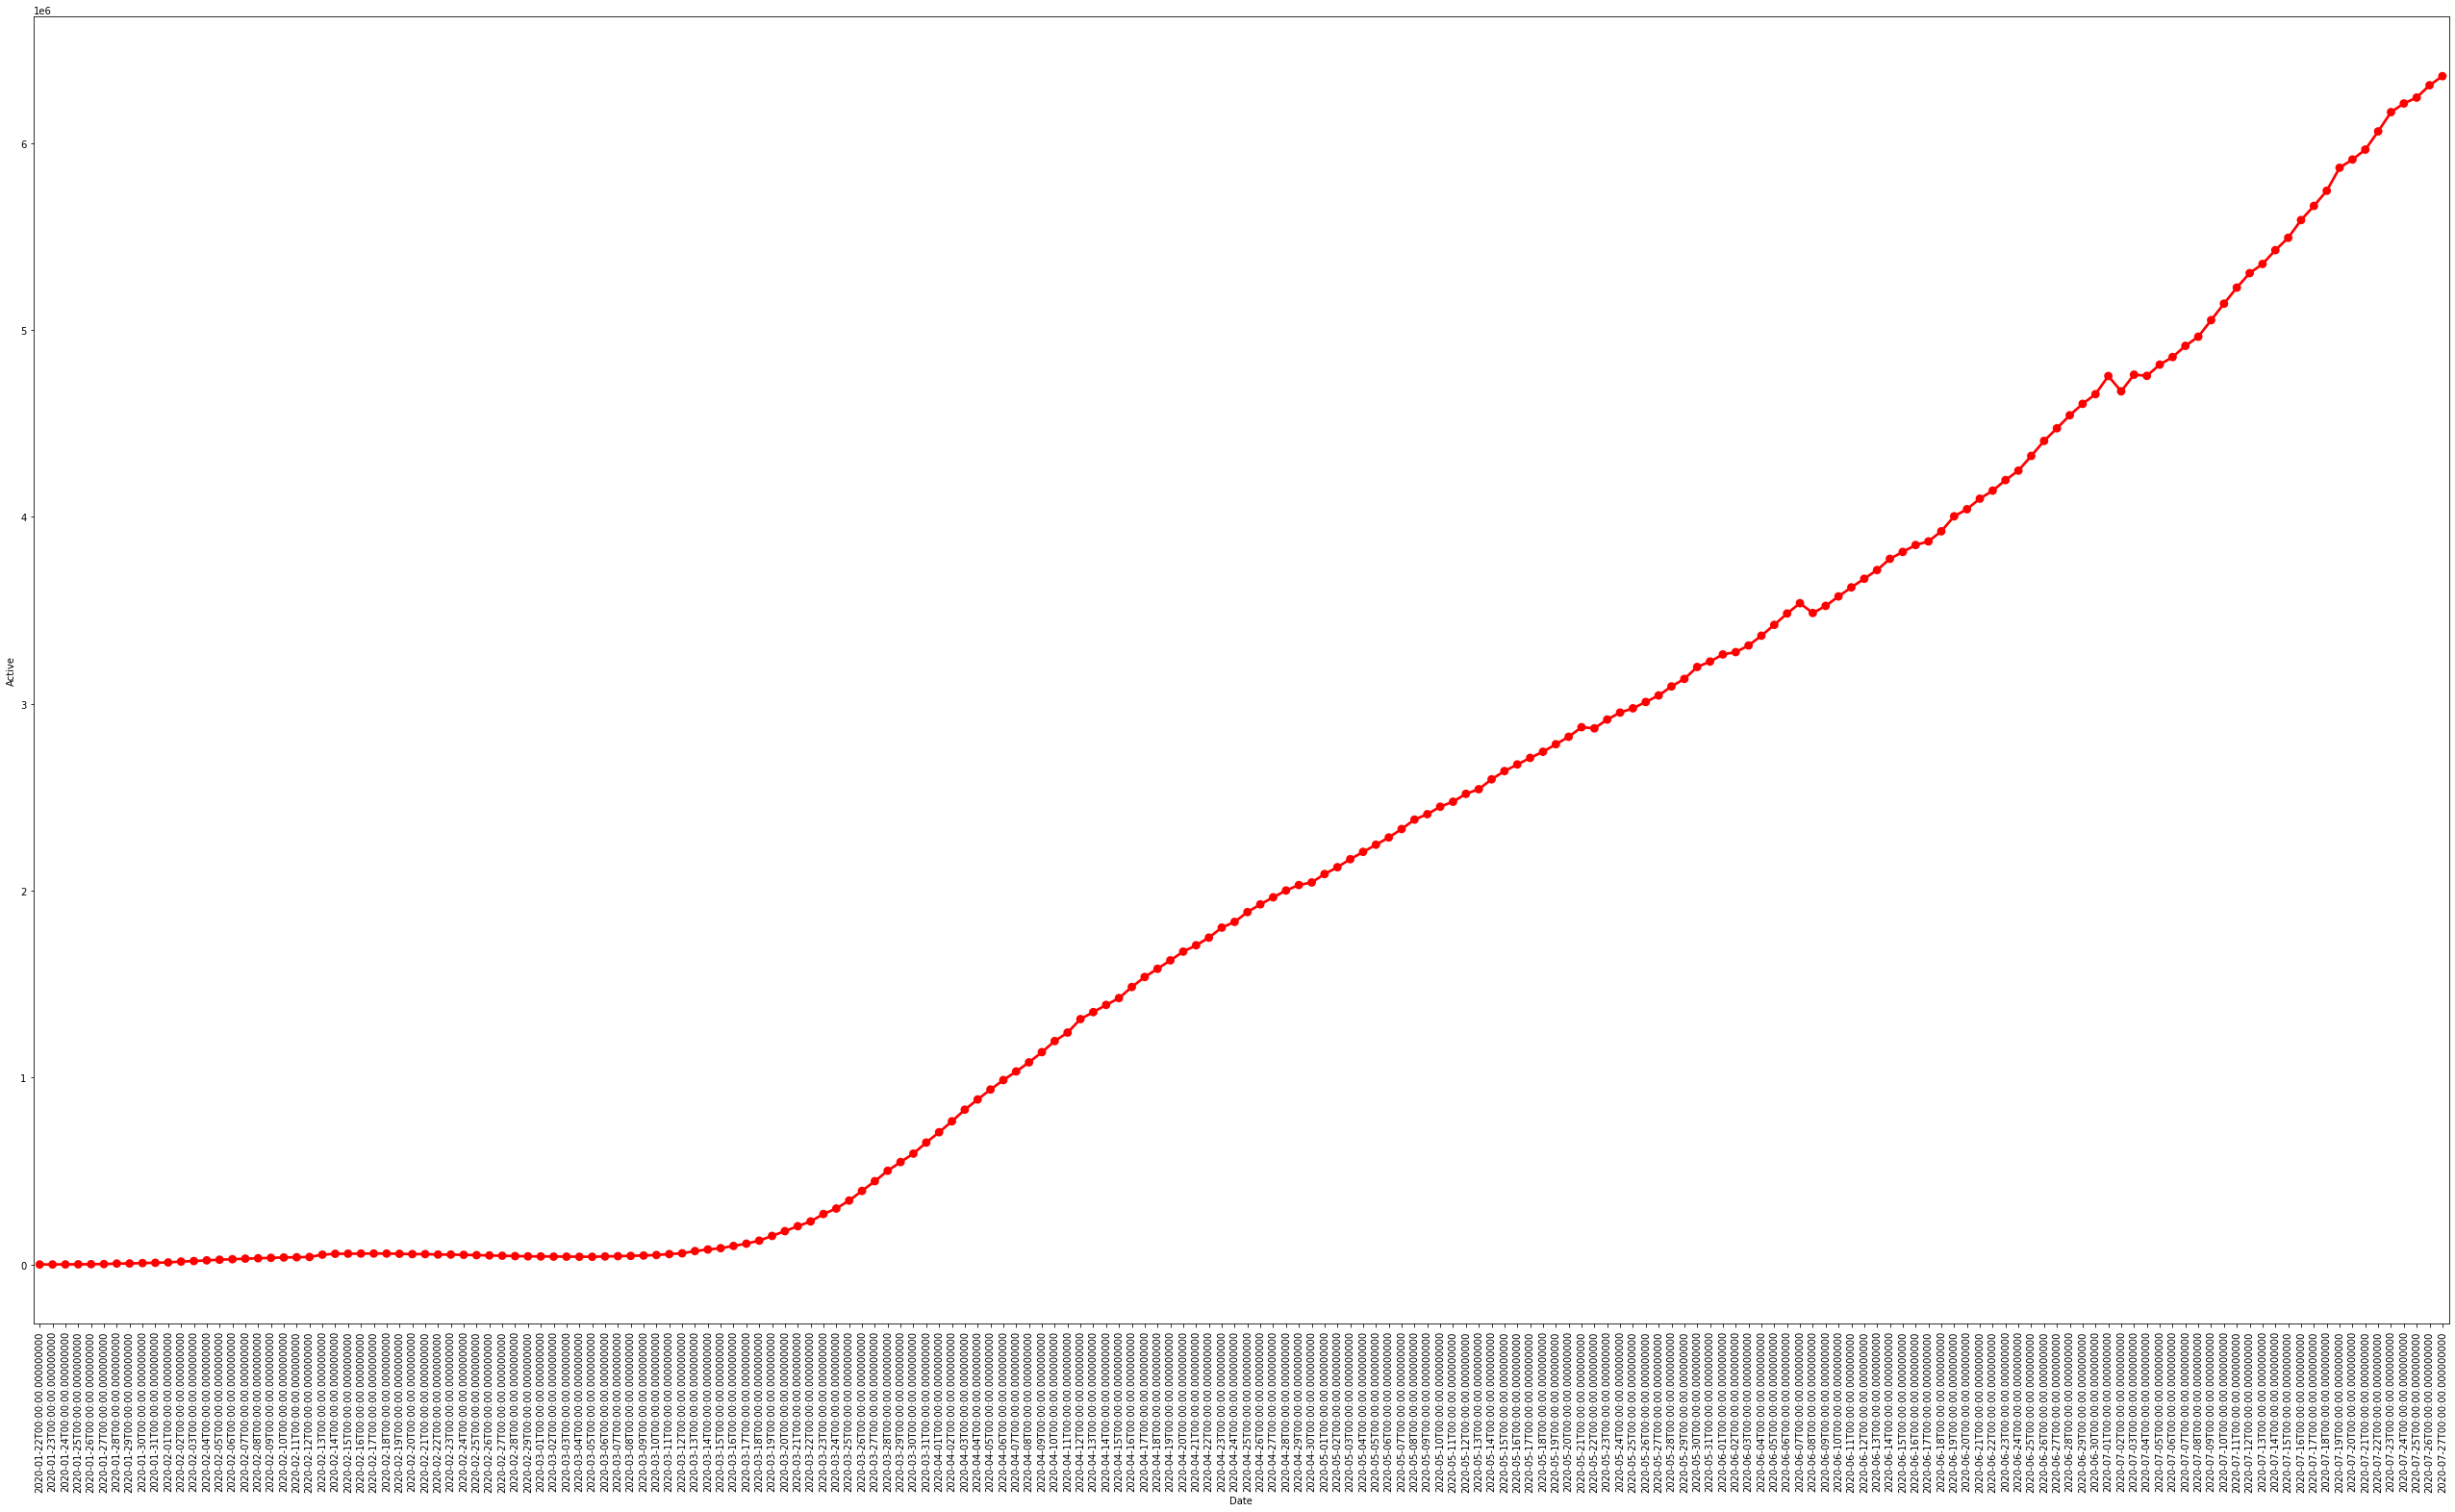

In [15]:
plt.figure(figsize=(45,25))
plt.xticks(rotation=90)
sns.pointplot(total_active_cases['Date'],total_active_cases['Active'],color='red')
plt.show()  # it is a combination of line plot and scatter plot

In [16]:
## Plot Death Cases Vs Date
total_death_cases = data.groupby('Date')['Deaths'].sum().reset_index()
total_death_cases

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


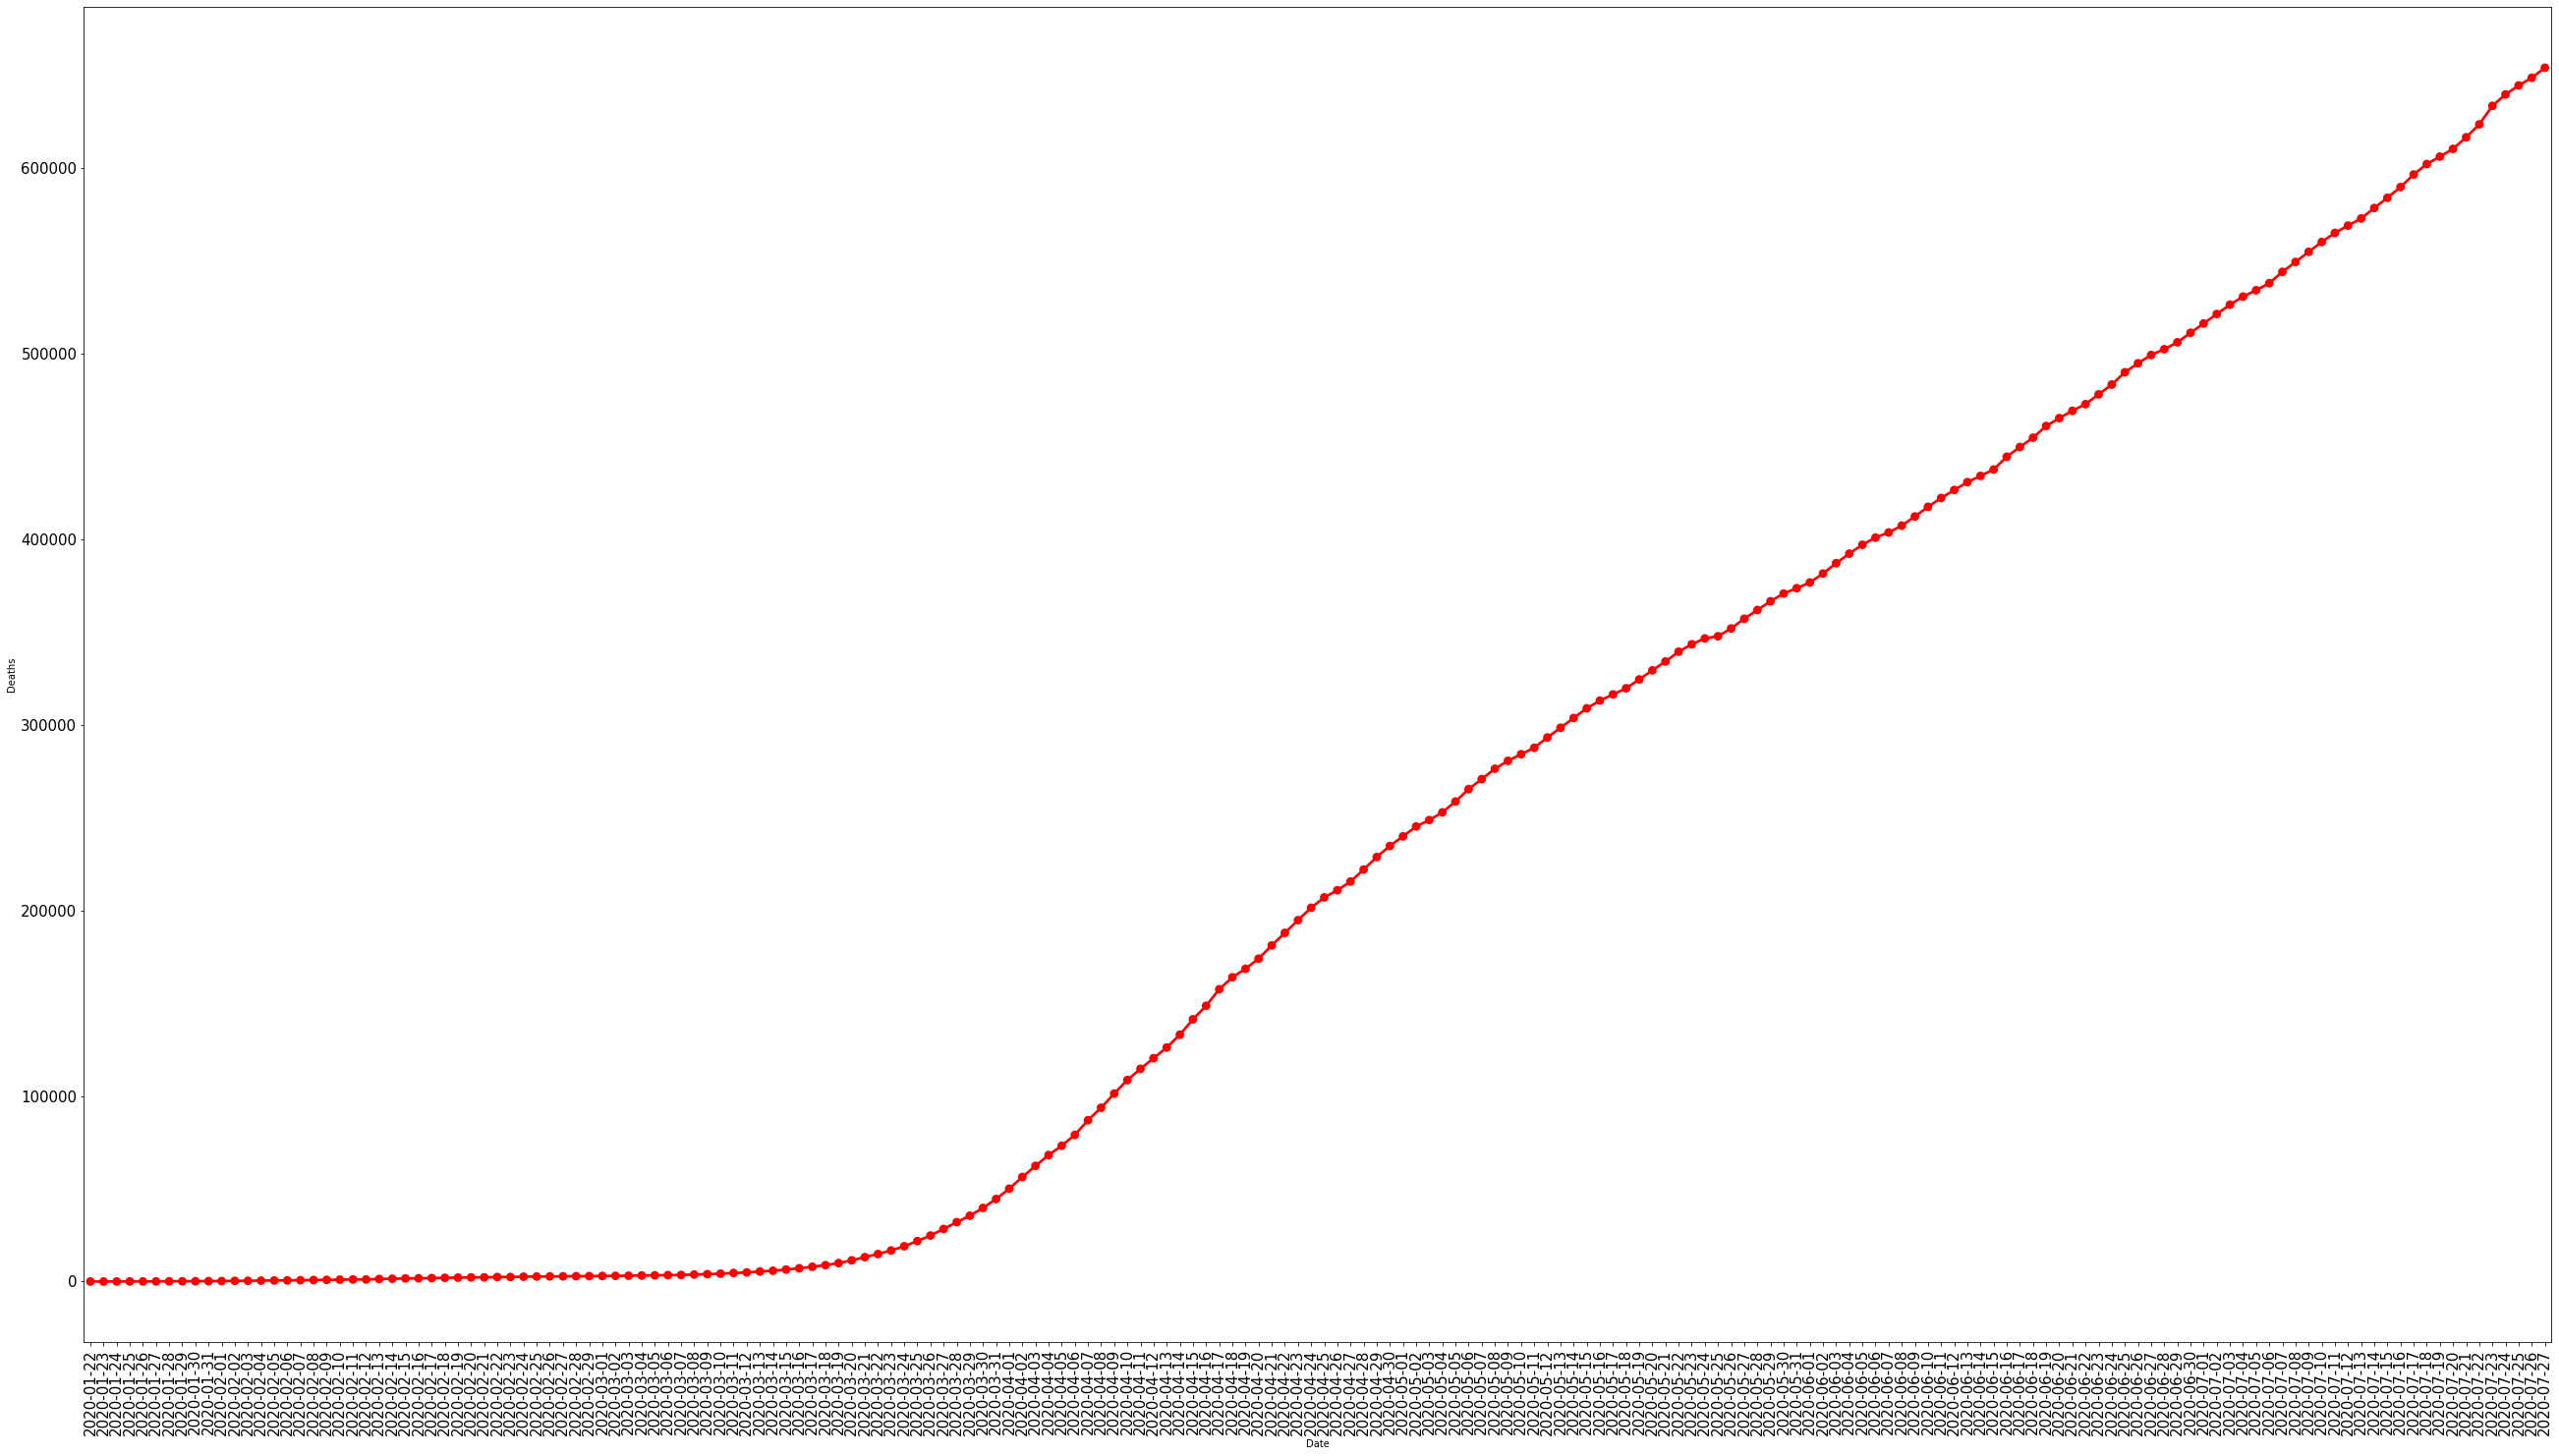

In [17]:
plt.figure(figsize=(45,25))
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
sns.pointplot(total_death_cases['Date'].dt.date,total_death_cases['Deaths'],color='red')
plt.show()

In [18]:
### Top 20 Countries having maximum confirmed cases and Recovery Rate
top_cases = top.groupby('Country')["Confirmed","Recovered"].sum()
top_cases.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Confirmed,Recovered
Country,,
Afghanistan,36263,25198
Albania,4880,2745
Algeria,27973,18837
Andorra,907,803
Angola,950,242


In [19]:
### Sort data
top_cases = top_cases.sort_values("Confirmed",ascending=False).reset_index()
top_cases

,Country,Confirmed,Recovered
0,US,4290259,1325804
1,Brazil,2442375,1846641
2,India,1480073,951166
3,Russia,816680,602249
4,South Africa,452529,274925
...,...,...,...
182,Dominica,18,18
183,Saint Kitts and Nevis,17,15
184,Greenland,14,13
185,Holy See,12,12


In [20]:
top_20 = top_cases.head(20)
top_20

,Country,Confirmed,Recovered
0,US,4290259,1325804
1,Brazil,2442375,1846641
2,India,1480073,951166
3,Russia,816680,602249
4,South Africa,452529,274925
5,Mexico,395489,303810
6,Peru,389717,272547
7,Chile,347923,319954
8,United Kingdom,301708,1437
9,Iran,293606,255144


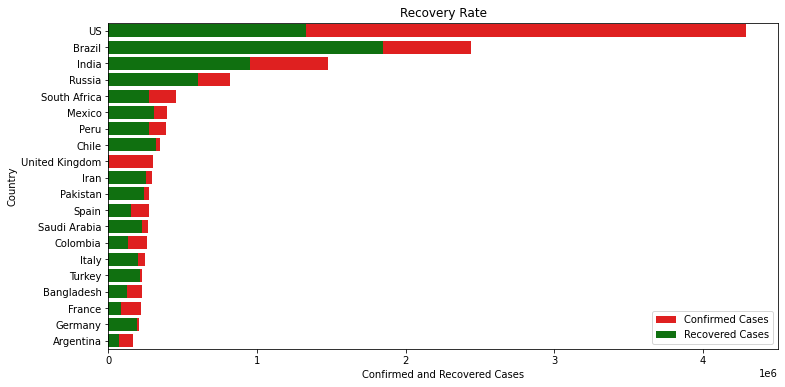

In [25]:
plt.figure(figsize = (12, 6))
sns.barplot(top_20['Confirmed'], top_20['Country'], color = 'red', label = 'Confirmed Cases')
sns.barplot(top_20['Recovered'], top_20['Country'], color = 'green', label = 'Recovered Cases')
plt.title('Recovery Rate')
plt.xlabel('Confirmed and Recovered Cases')
plt.legend(loc = 4)
plt.show()

In [26]:
india = data[data['Country']=="India"]
india_recovered = india.groupby('Date')['Recovered'].sum().reset_index()
india_recovered

,Date,Recovered
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
183,2020-07-23,817209
184,2020-07-24,849432
185,2020-07-25,885573
186,2020-07-26,917568


In [27]:
usa = data[data['Country']=="US"]
usa_recovered = usa.groupby('Date')['Recovered'].sum().reset_index()
usa_recovered

,Date,Recovered
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
183,2020-07-23,1233269
184,2020-07-24,1261624
185,2020-07-25,1279414
186,2020-07-26,1297863


In [28]:
china = data[data['Country']=="China"]
china_recovered = china.groupby('Date')['Recovered'].sum().reset_index()
china_recovered

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,49
...,...,...
183,2020-07-23,78701
184,2020-07-24,78745
185,2020-07-25,78813
186,2020-07-26,78862


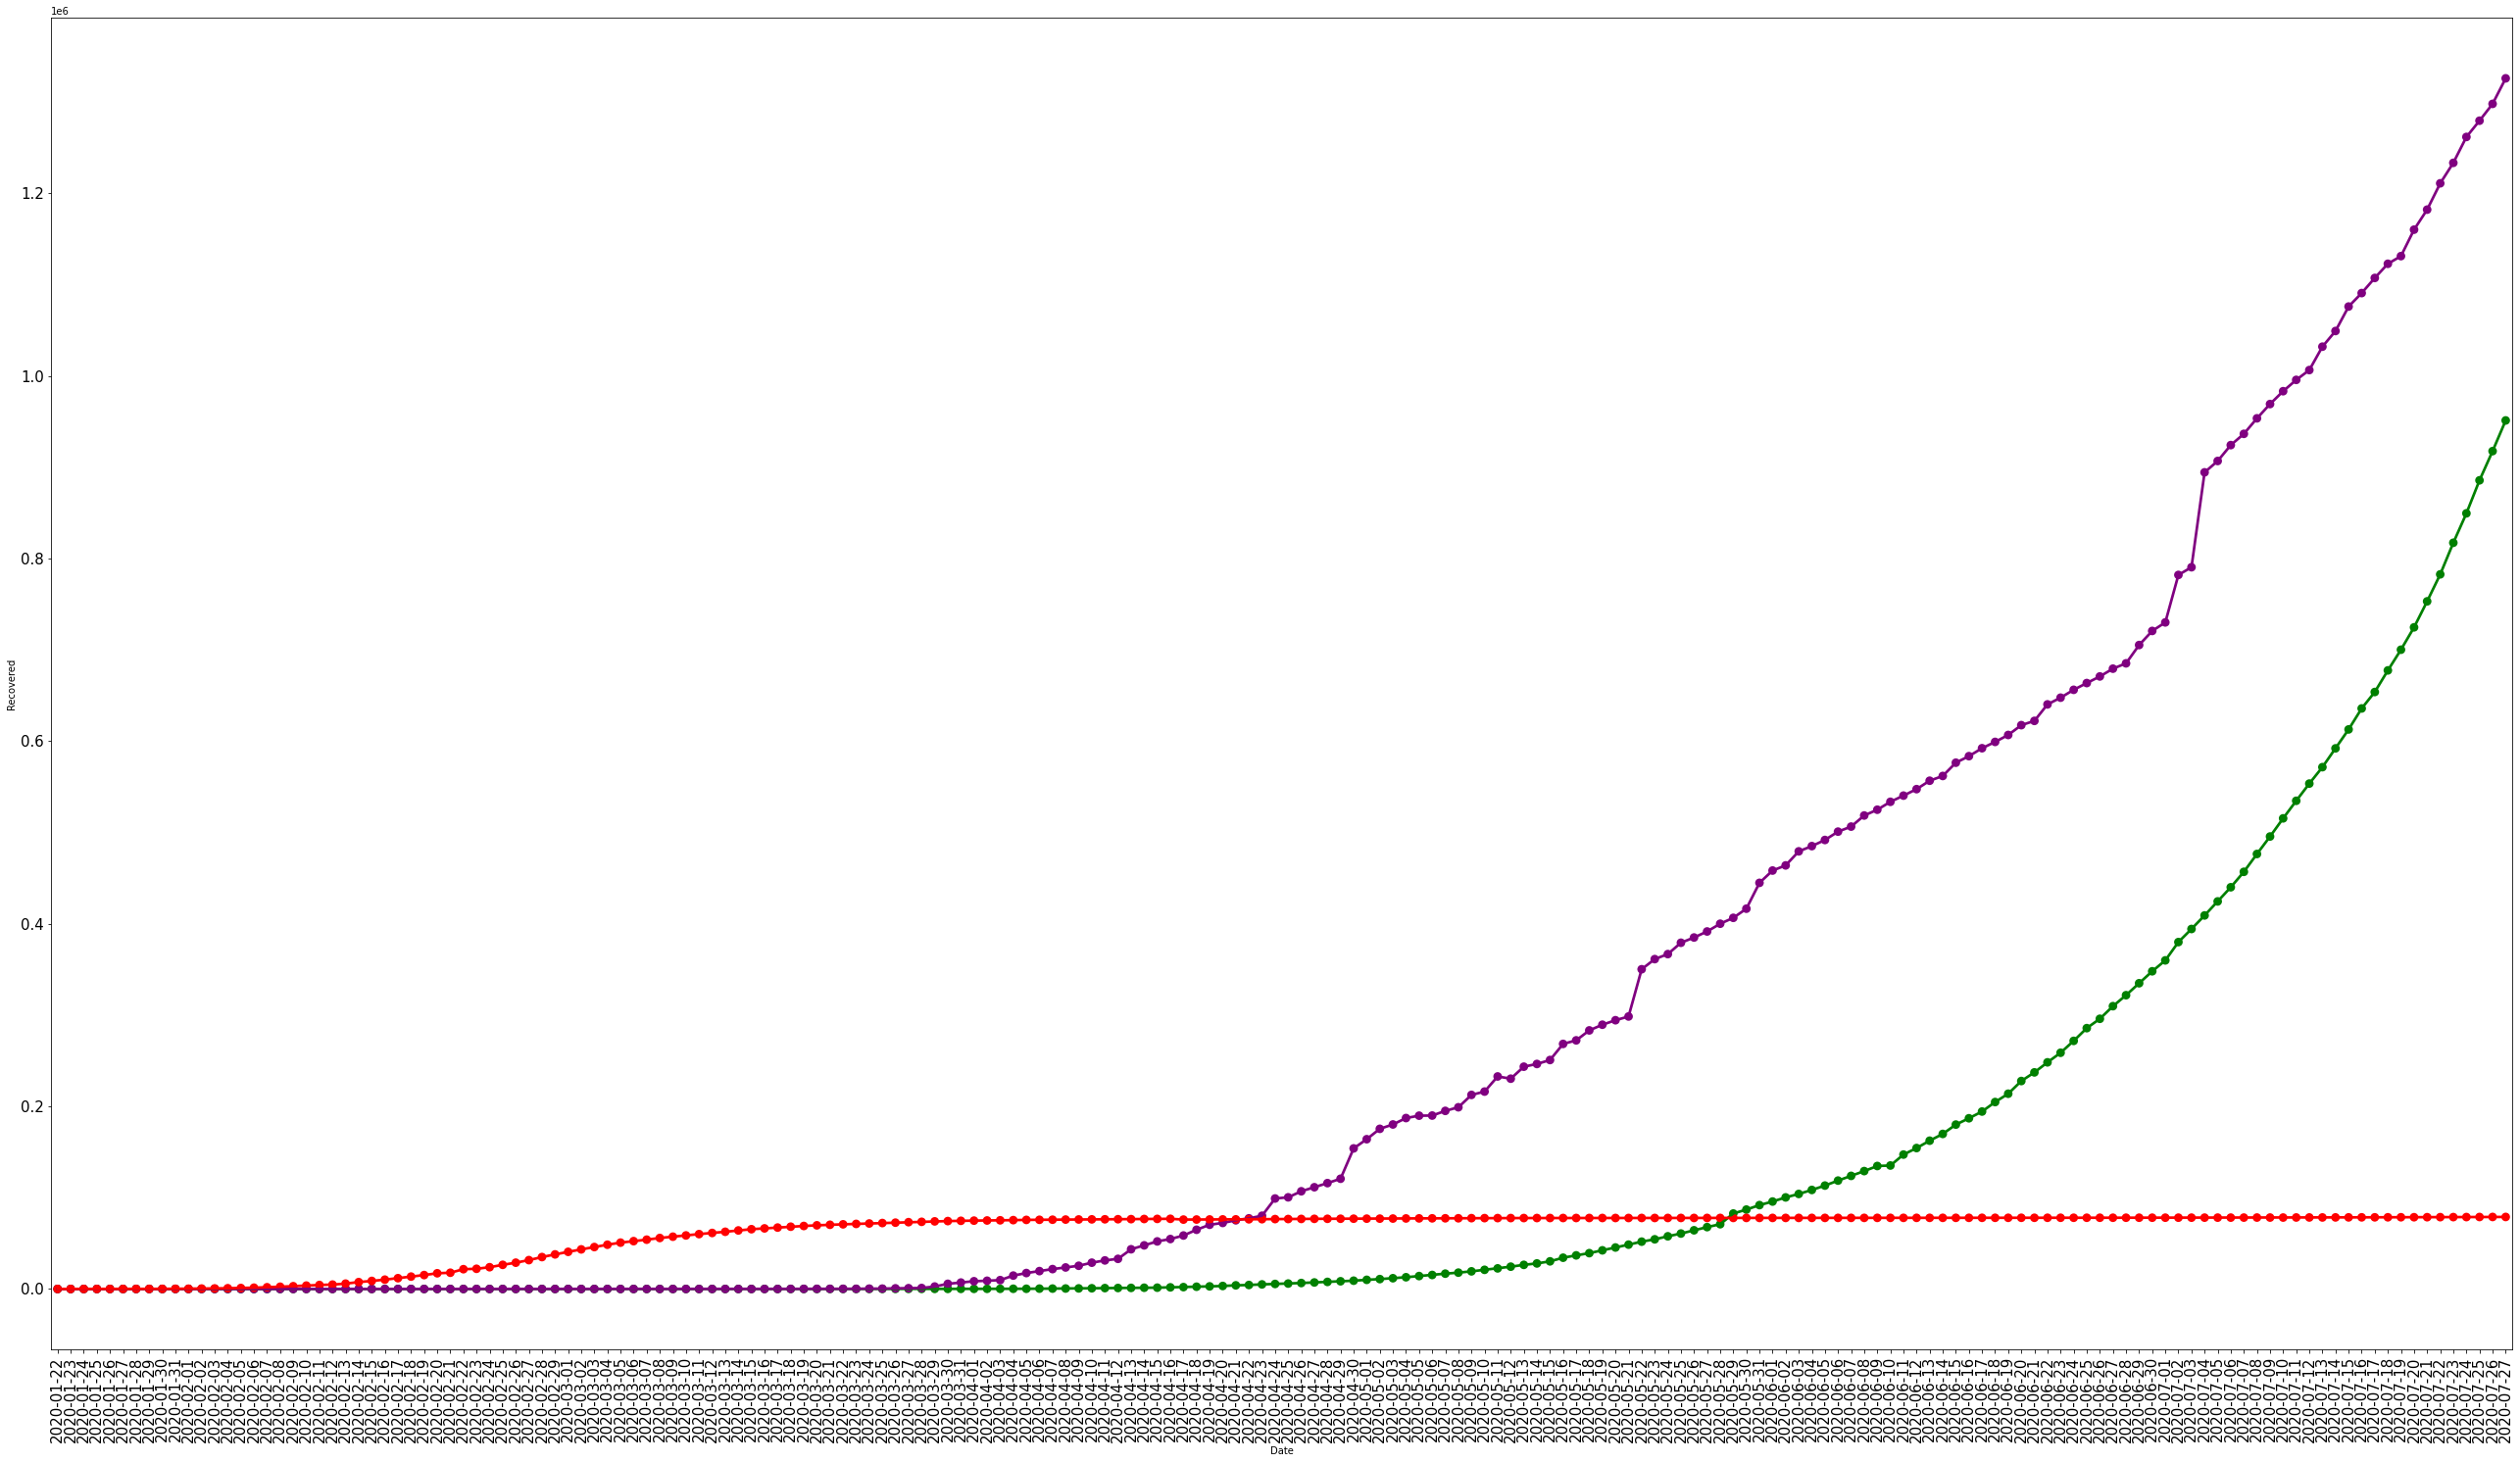

In [29]:
plt.figure(figsize=(45,25))
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
sns.pointplot(india_recovered['Date'].dt.date,india_recovered['Recovered'],color='green')
sns.pointplot(usa_recovered['Date'].dt.date,usa_recovered['Recovered'],color='purple')
sns.pointplot(china_recovered['Date'].dt.date,china_recovered['Recovered'],color='red')
plt.show()

In [30]:
india = data[data['Country']=="India"]
india_confirmed = india.groupby('Date')['Confirmed'].sum().reset_index()
india_confirmed

,Date,Confirmed
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
183,2020-07-23,1288108
184,2020-07-24,1337024
185,2020-07-25,1385635
186,2020-07-26,1435616


In [31]:
usa = data[data['Country']=="US"]
usa_confirmed = usa.groupby('Date')['Confirmed'].sum().reset_index()
usa_confirmed

,Date,Confirmed
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5
...,...,...
183,2020-07-23,4038816
184,2020-07-24,4112531
185,2020-07-25,4178970
186,2020-07-26,4233923


In [32]:
china = data[data['Country']=="China"]
china_confirmed = china.groupby('Date')['Confirmed'].sum().reset_index()
china_confirmed

,Date,Confirmed
0,2020-01-22,548
1,2020-01-23,643
2,2020-01-24,920
3,2020-01-25,1406
4,2020-01-26,2075
...,...,...
183,2020-07-23,86045
184,2020-07-24,86202
185,2020-07-25,86381
186,2020-07-26,86570


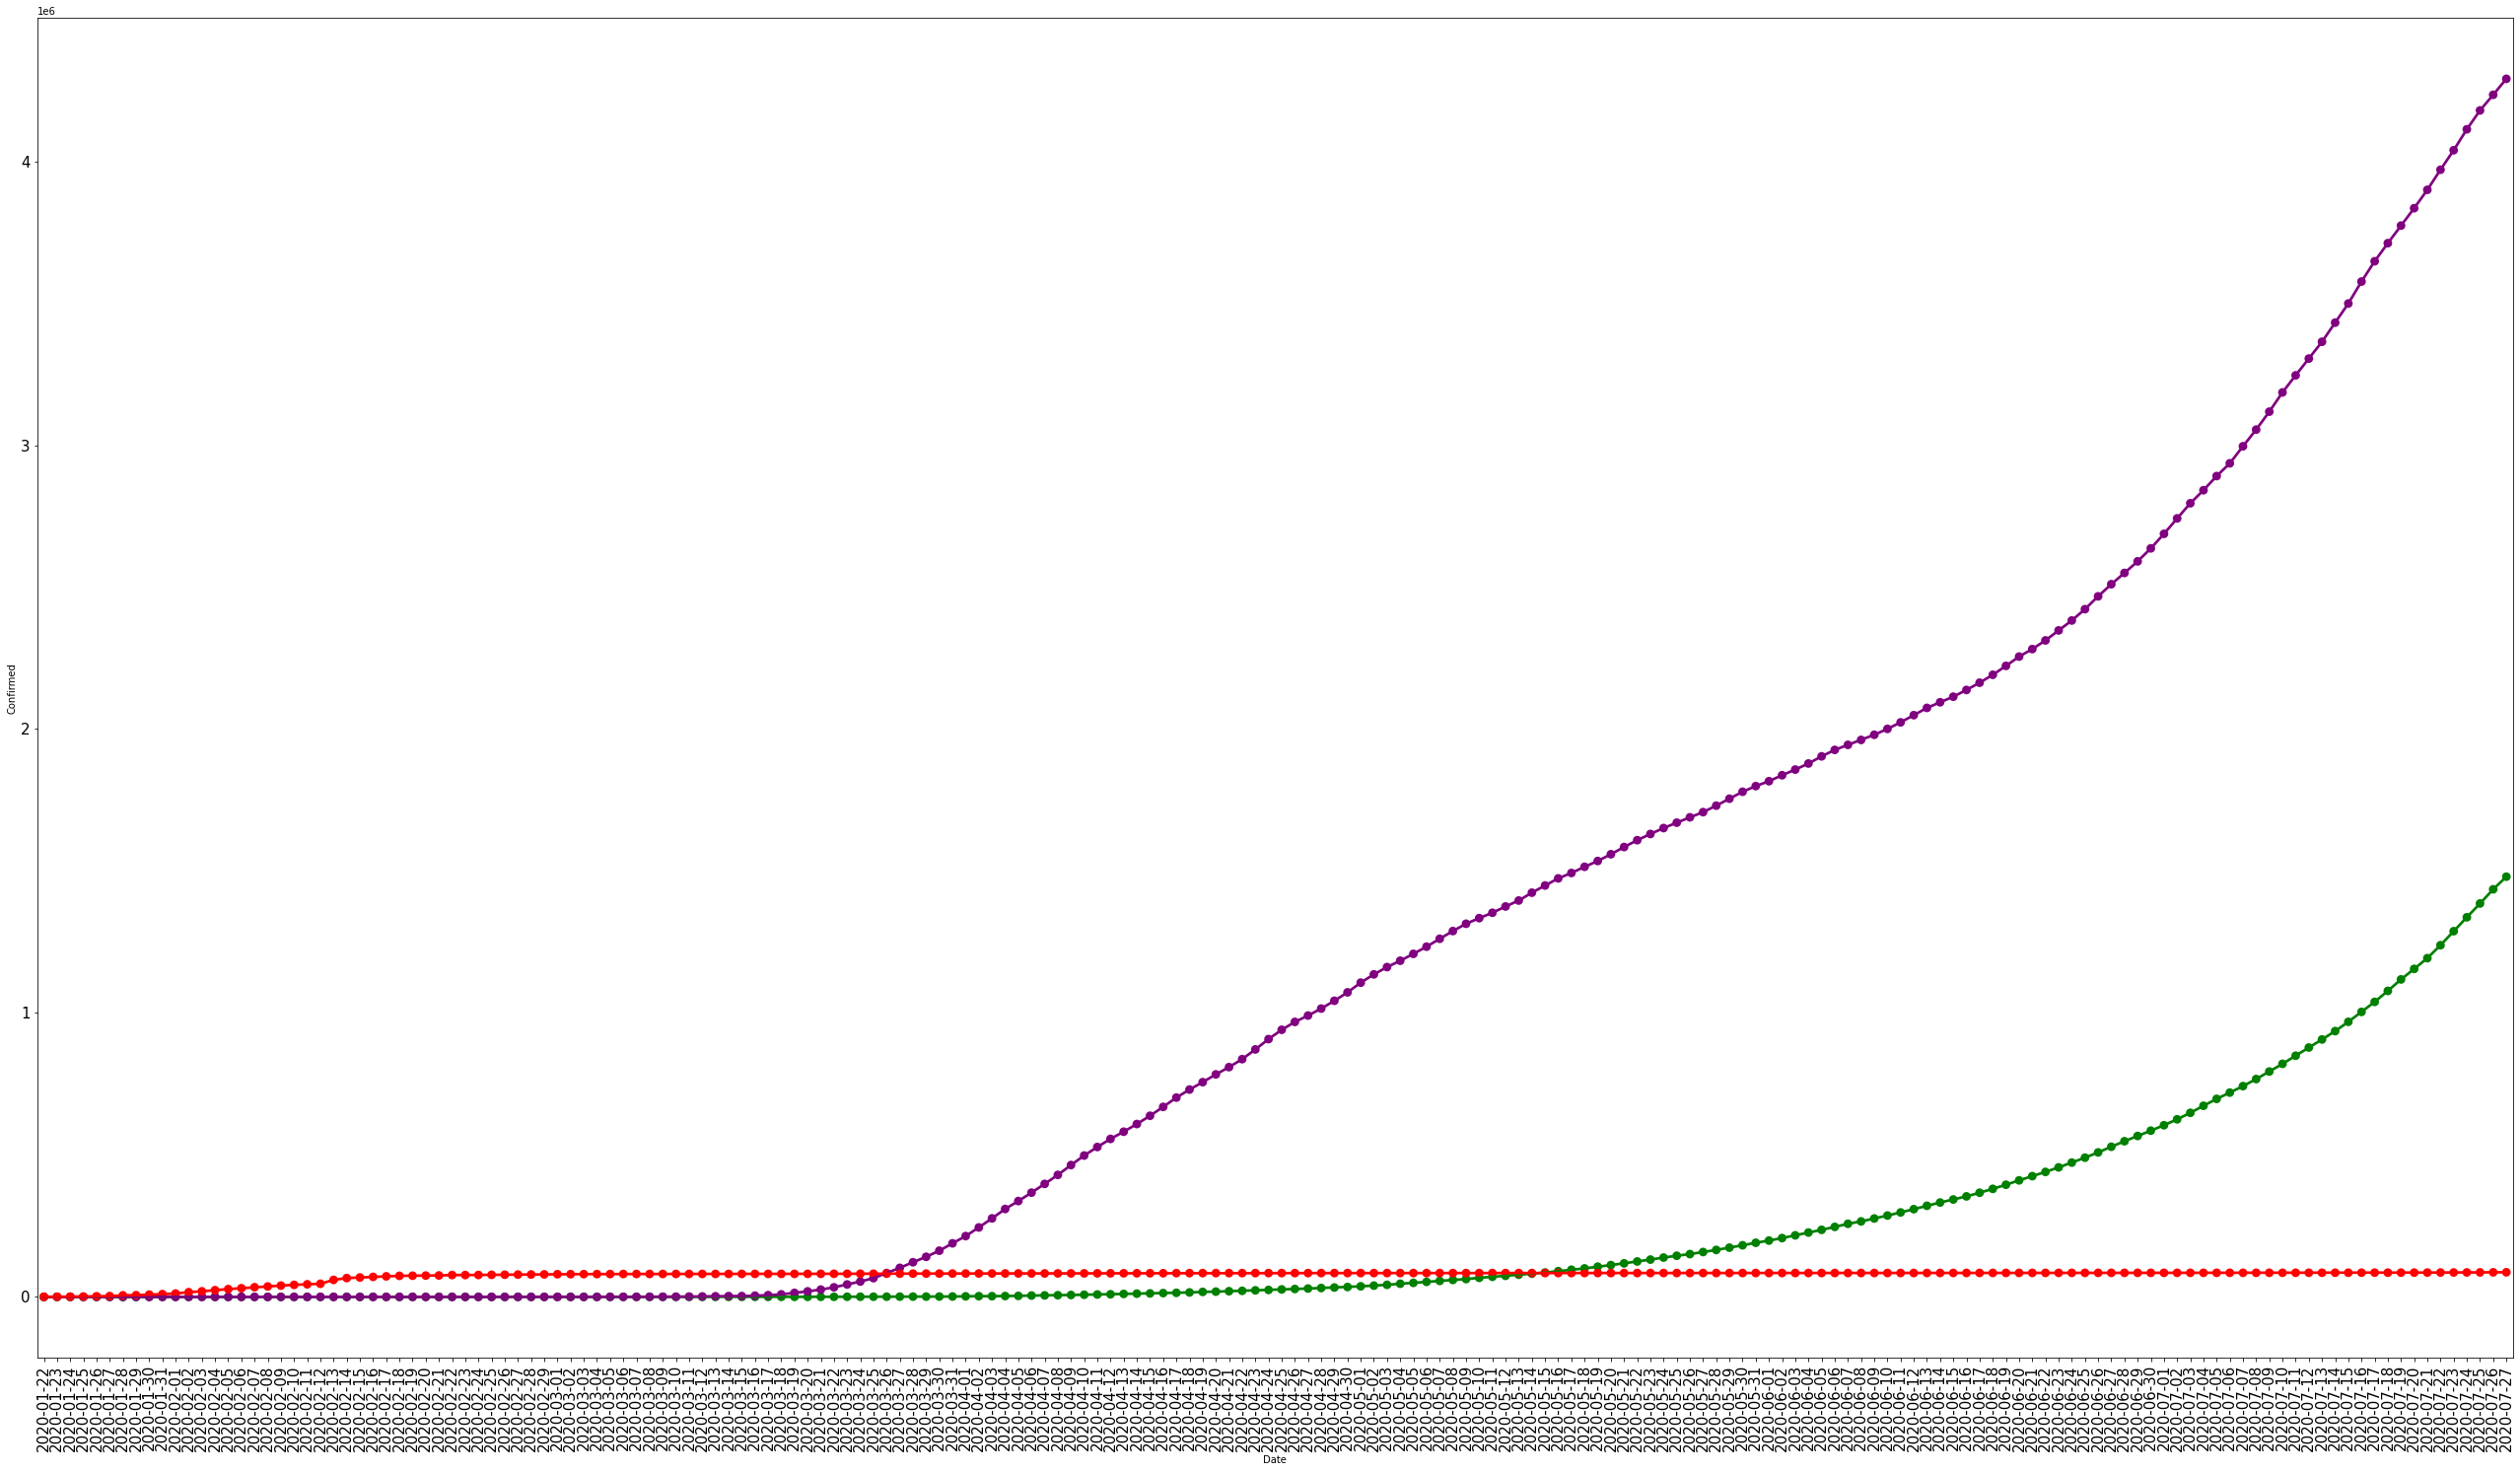

In [33]:
plt.figure(figsize=(45,25))
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
sns.pointplot(india_confirmed ['Date'].dt.date,india_confirmed ['Confirmed'],color='green')
sns.pointplot(usa_confirmed ['Date'].dt.date,usa_confirmed ['Confirmed'],color='purple')
sns.pointplot(china_confirmed ['Date'].dt.date,china_confirmed ['Confirmed'],color='red')
plt.show()